### El látigo y las ondas de choque

1. Considere primero el caso de una cuerda con la misma *masa por unidad de longitud* a la cual se le imprime un pulso en uno de sus extremos y el otro extremo está fijo. Calcular la velocidad y el desplazamiento del otro extremo. Para darse una idea puede utilizar alguno de los simuladores que hay disponibles en la red. El de la Universidad de Colorado es particularmente bueno.


$$ \frac{\partial^2 y}{\partial x^2} = \frac{1}{v^2} \frac{\partial^2 y}{\partial t^2}$$

$$ \frac{\partial^2 y}{\partial x^2} = -k^2 = \frac{1}{v^2} \frac{\partial^2 y}{\partial t^2} $$


Spatial Equation


$$ \frac{\partial^2 y}{\partial x^2} + k^2 = 0 $$

System of first order equation


$$ \frac{\partial y}{\partial x} = u(x) $$

$$ \frac{\partial u}{\partial x} = -k^2 $$


Model Assumption

$$  Y(x, t) = X(x)\cdot T(t) $$

In [18]:
from scipy.integrate import odeint
import numpy as np 


def model(_input, x, k):
    y, u = _input
    dydx = [u, -k**2 ]
    return dydx

k = 2

y0 = [ 0, 10]
x = np.linspace(0, 1000, 101)

sol = odeint(model, y0, x, args=(k,))

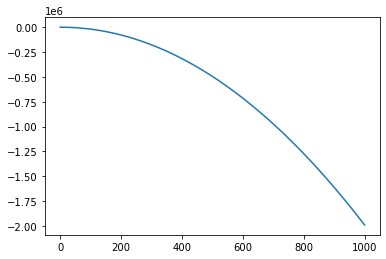

In [19]:
import matplotlib.pyplot as plt


plt.plot(x, sol[:, 0])